In [8]:
import matplotlib as mpl
import zipfile
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
from os import listdir
import cv2
from sklearn.svm import SVC
import os
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from numpy.linalg import norm
# from toolz import pluck
import typing
from json import loads, dumps
from time import time
from sklearn.metrics import roc_curve, auc
from itertools import product
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
image_dir = 'spatial_envelope_256x256_static_8outdoorcategories'

### Remove all unnesesery images with other label

In [9]:
def remove_files(folder):
    # get list of all files in the folder
    file_list = os.listdir(folder)
    # loop through each file in the list
    for file in file_list:
        # check if the file does not start with "insidecity" or "highway"
        if not file.startswith("insidecity") and not file.startswith("coast"):
            # delete the file
            os.remove(os.path.join(folder, file))
remove_files(image_dir)

### Set the directory containing the images
##### Get a list of all the image files in the directory

In [10]:
image_files = glob.glob(image_dir + '/*.jpg')

# Load the images
images = []
labels = []
for file in image_files:
    labels.append(file.split("\\")[-1].split("_")[0])
    img = cv2.cvtColor(plt.imread(file),cv2.COLOR_RGB2GRAY)
    images.append(img)
images = np.array(images)
images_flat = images.reshape(images.shape[0],images.shape[1]*images.shape[2])

### split the data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2,shuffle=True ,random_state=101)

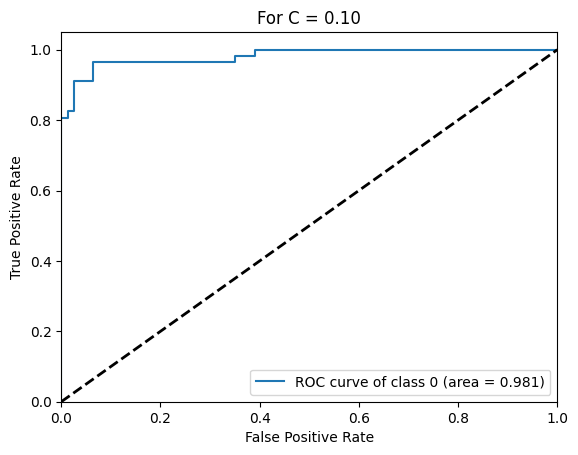

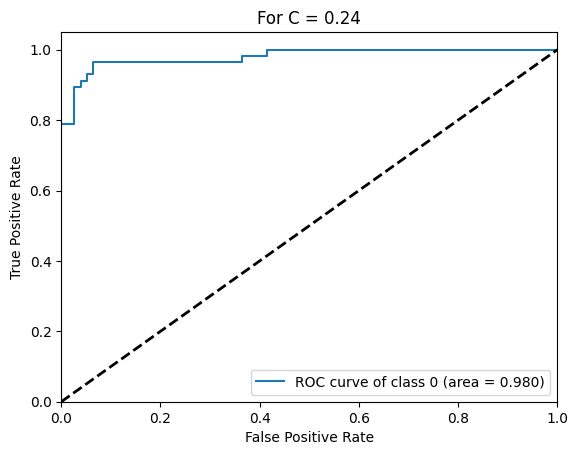

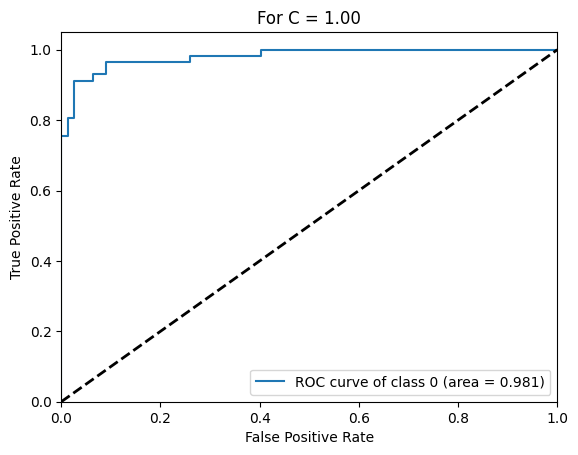

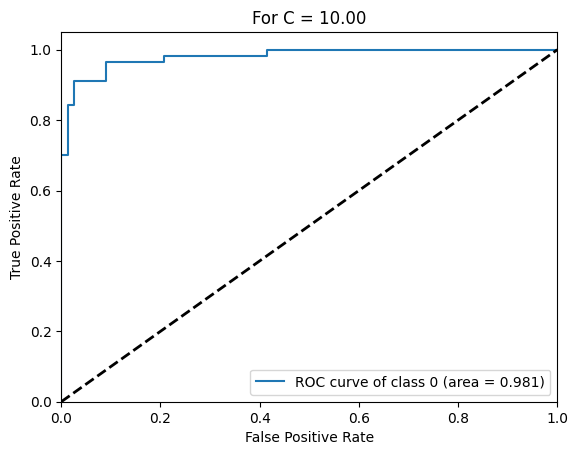

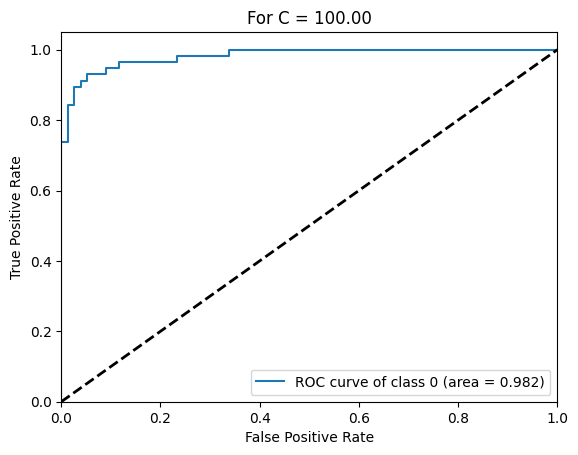

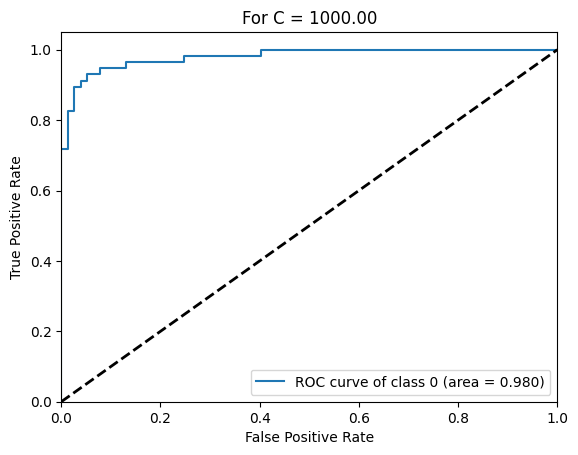

c:\users\mrpaz\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\mrpaz\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\mrpaz\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\mrpaz\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


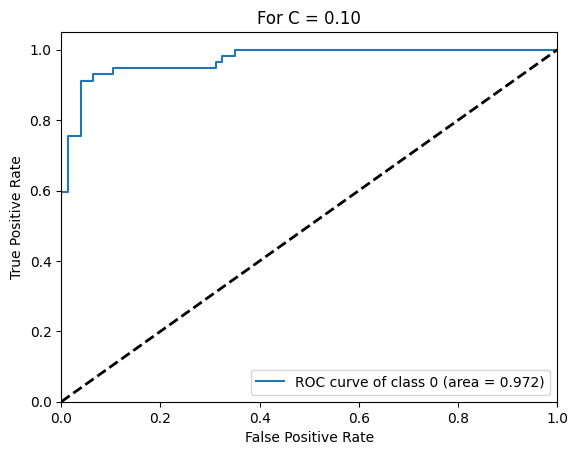

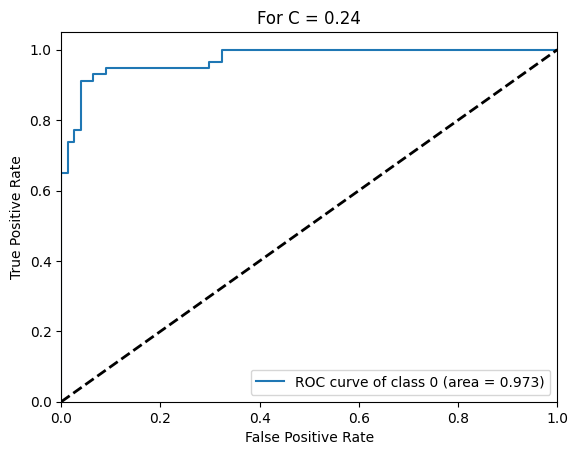

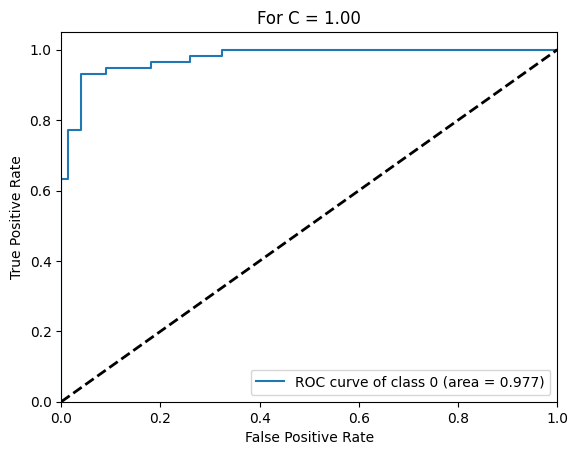

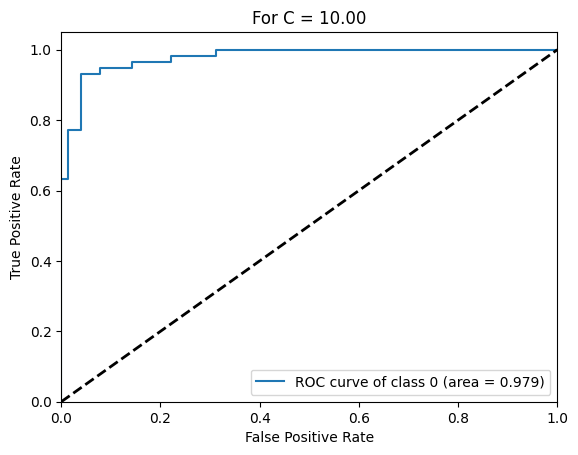

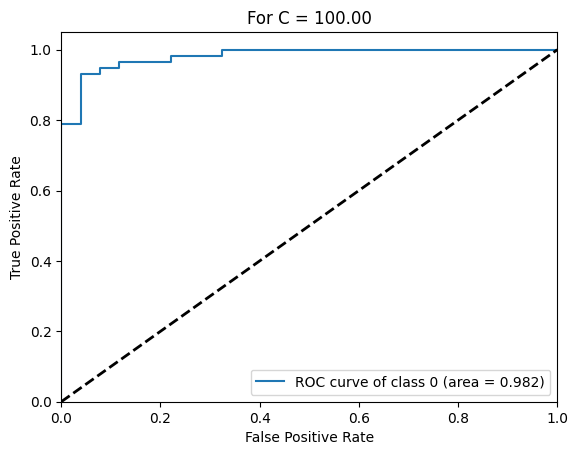

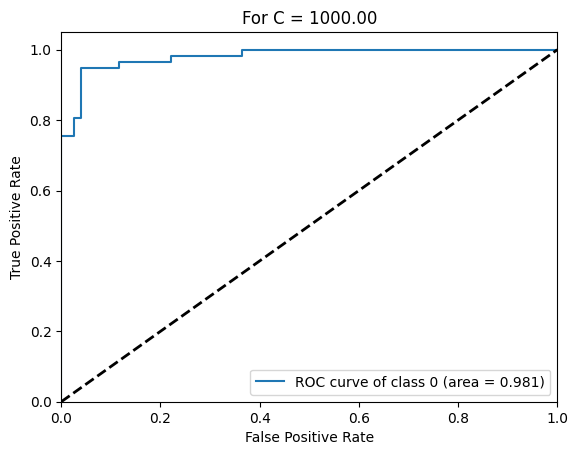

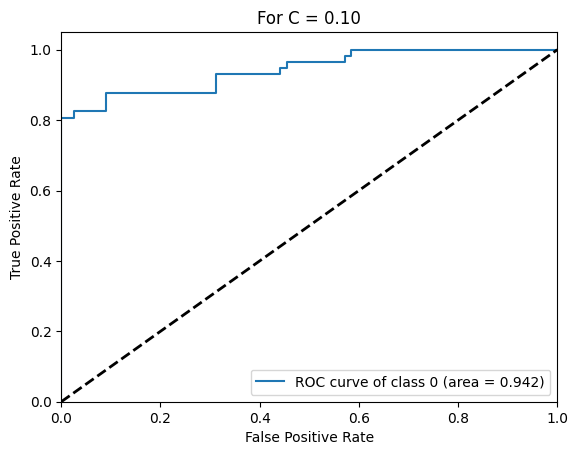

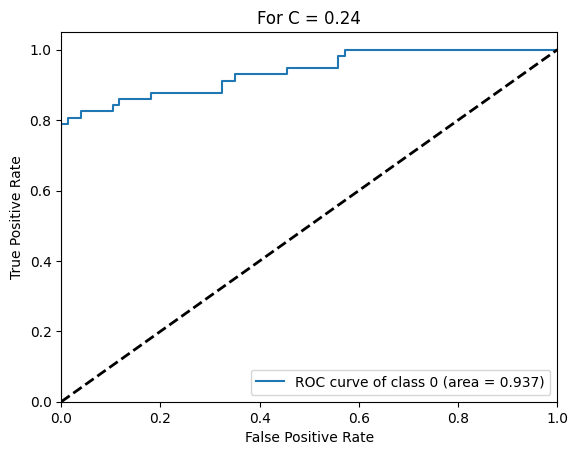

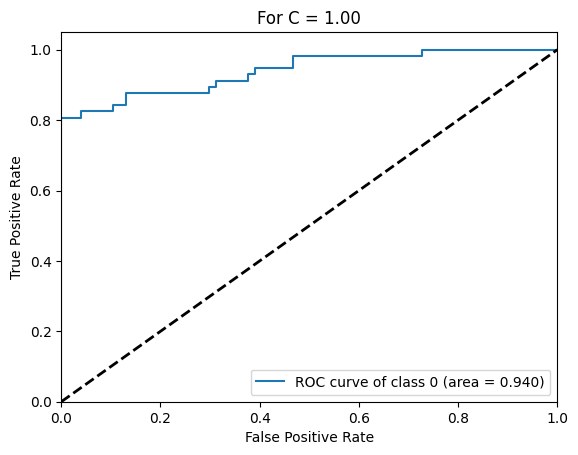

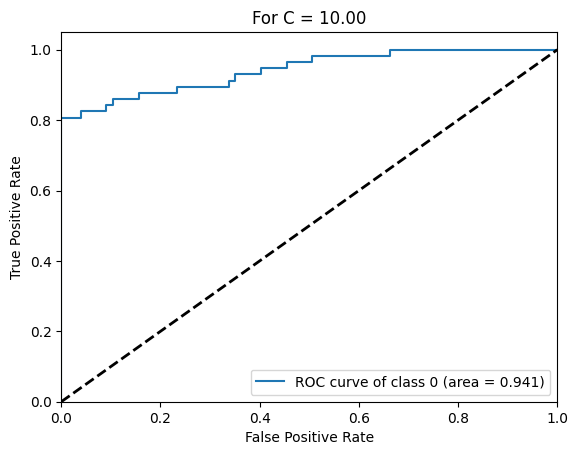

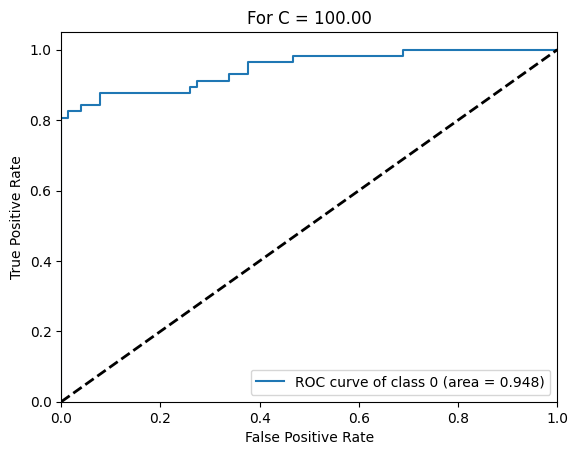

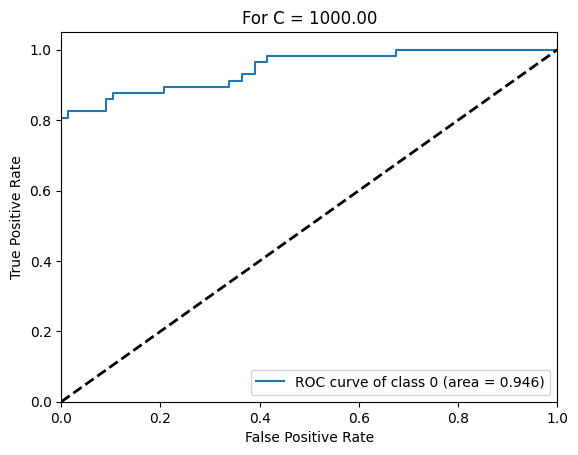

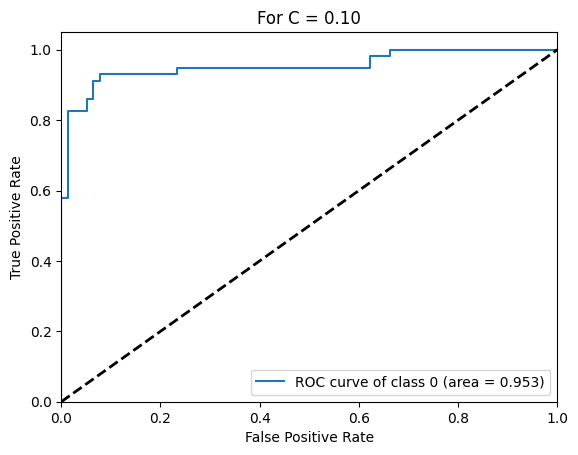

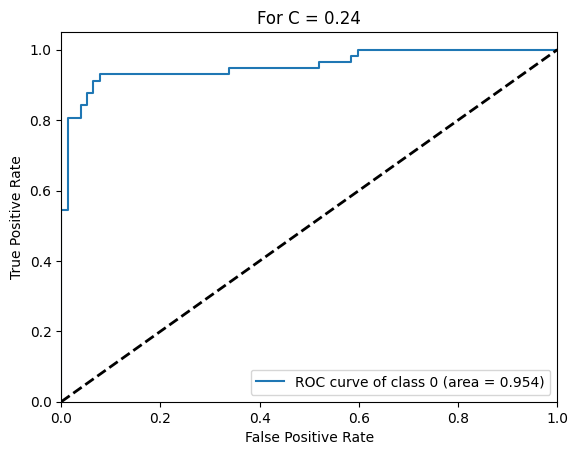

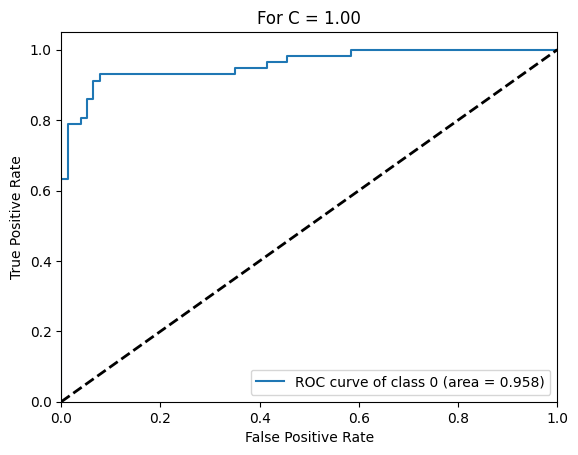

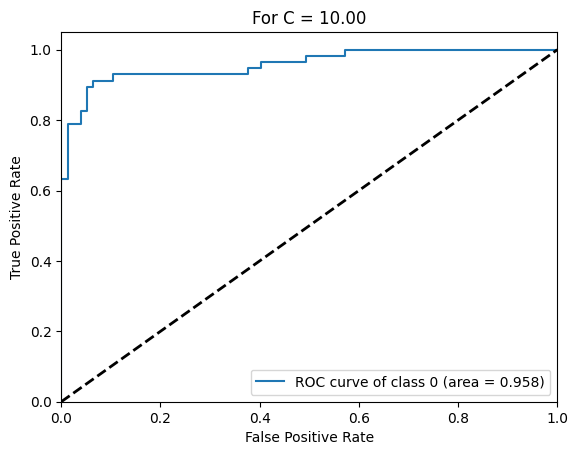

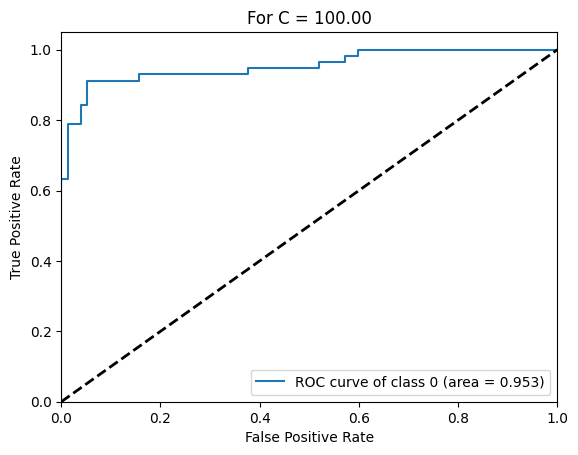

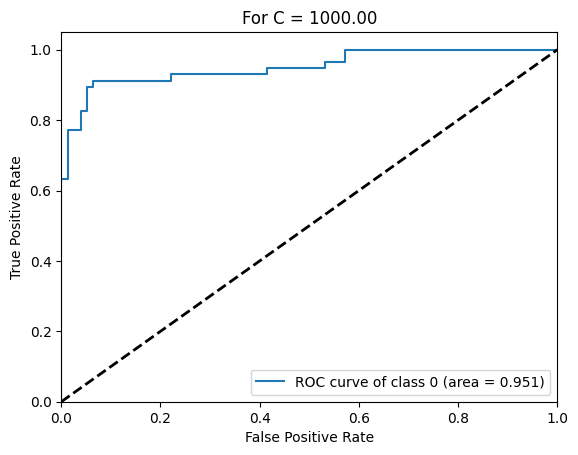

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from itertools import *

files = os.listdir("spatial_envelope_256x256_static_8outdoorcategories/")
categories = [0,1]
cate1 = "coast"
cate2 = "insidecity"
mapping = {cate1: [], cate2: []}


def categorize(name):
    cat = name.partition("_")[0]
    
    if (mapping.get(cat) != None):
        mapping[cat].append(cv2.imread("spatial_envelope_256x256_static_8outdoorcategories/" + name))


map(categorize, files)
train_set = []
test_set = []
cat1 = mapping[cate1]
n_clusters =150
percent = [0.6,0.7,0.8,0.9]
roc_Results = []
roc_index =0
c_values = [0.1,0.24,1,10,100,1000]
for per in percent:

 
    mbk = MiniBatchKMeans(n_clusters=n_clusters)

    descriptions = []
    sift = cv2.SIFT_create()
    for gray in x_train:
        # gray = cv2.cvtColor(train_img, cv2.COLOR_RGB2GRAY)
        kp = sift.detect(gray)
        kp, des = sift.compute(gray, kp)
        descriptions.append(des)
        mbk.partial_fit(des)
    #calcition histgrom
    histograms = []
    for des in descriptions:
        im_mean = mbk.predict(des)
        his, bins = np.histogram(im_mean, bins=n_clusters-1)
        histograms.append(his)
    roc_Results.append([])

    #svm
    for c in c_values:
        linear_svm = svm.LinearSVC(C=c)
        linear_svm.fit(histograms, y_train)

        # test
        descriptions_test = []
        
        for gray in x_test:
            # gray = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
            kp = sift.detect(gray)
            kp, des = sift.compute(gray, kp)
            descriptions_test.append(des)
            mbk.partial_fit(des)

        # histograms test
        histograms_test = []
        for des in descriptions_test:
            im_mean = mbk.predict(des)
            his, bins = np.histogram(im_mean, bins=n_clusters - 1)
            histograms_test.append(his)

        predictions = linear_svm.predict(histograms_test)
        y_score = linear_svm.decision_function(histograms_test)
        # print(
        # "Classification report for classifier %s:\n%s\n" % (linear_svm, metrics.classification_report(y_test, predictions)))
        # print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

        # Compute ROC curve and ROC area for each class

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        # print(y_test)
        # print(y_score)
        Y_test = [0 if "coast"==label else 1 for label in y_test ]
        fpr, tpr, _ = roc_curve(Y_test, y_score)
        roc_auc = auc(fpr, tpr)
        roc_Results[roc_index].append([fpr,tpr,roc_auc])
        plt.figure()

        plt.plot(fpr, tpr,
                 label='ROC curve of class {0} (area = {1:0.3f})'
                       ''.format(0, roc_auc))

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('For C = %0.2f' % (c))
        plt.legend(loc="lower right")
    roc_index+=1
    plt.show()

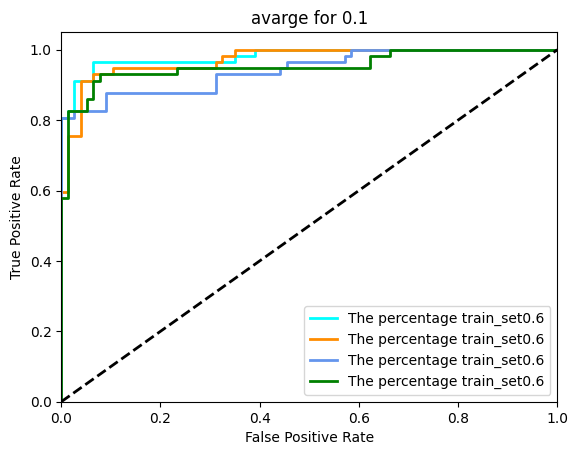

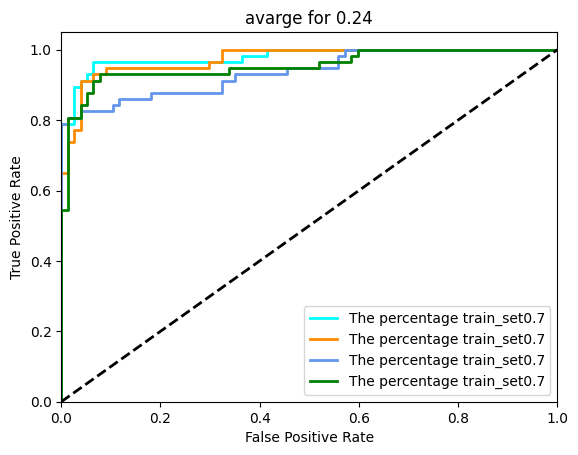

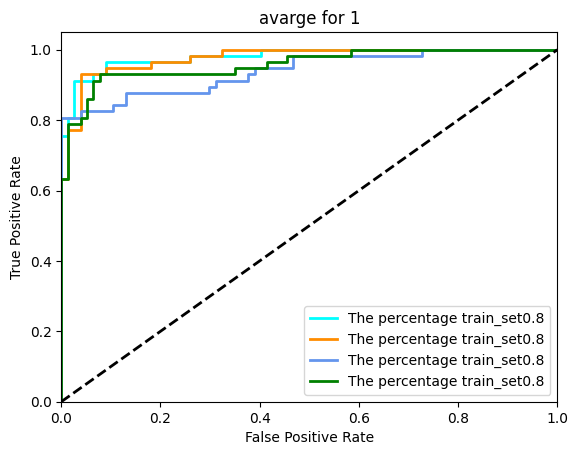

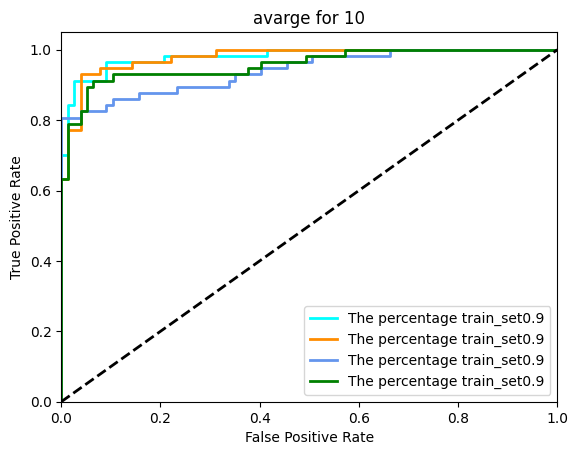

IndexError: list index out of range

In [14]:
#avarge
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green'])
for i in range(len(c_values)):
    for j, color in zip(range(roc_index), colors):
        plt.plot(roc_Results[j][i][0], roc_Results[j][i][1], color=color, lw=2,
                 label='The percentage train_set%s' %percent[i])

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('avarge for %s' %c_values[i])
    plt.legend(loc="lower right")
    plt.show()